### get movies data into shape for initial regressoion  

Variables for analysis:



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

movies = pd.read_pickle('movies_all_stars.pkl')
movies.set_index(['movie_title'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4810 entries, 0 to 4809
Data columns (total 41 columns):
color                        4794 non-null object
director_name                4740 non-null object
num_critic_for_reviews       4766 non-null float64
duration                     4799 non-null float64
director_facebook_likes      4740 non-null float64
actor_3_facebook_likes       4794 non-null float64
actor_2_name                 4810 non-null object
actor_1_facebook_likes       4804 non-null float64
gross                        4022 non-null float64
genres                       4810 non-null object
actor_1_name                 4810 non-null object
movie_title                  4810 non-null object
num_voted_users              4810 non-null int64
cast_total_facebook_likes    4810 non-null int64
actor_3_name                 4810 non-null object
facenumber_in_poster         4801 non-null float64
plot_keywords                4677 non-null object
movie_imdb_link              4810 non-

In [72]:
sum(az['WorldwideGross_y']== 0)

255

In [73]:
az = movies[movies['title_year'] >= 2000]
az = az[az['WorldwideGross_y'] > 0]
az['WorldwideGross_y'].describe()

count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [74]:
az = az[['color','duration','title_year','ProductionBudget_y',  'WorldwideGross_y','content_rating','num_stars']]
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 7 columns):
color                 3179 non-null object
duration              3175 non-null float64
title_year            3182 non-null float64
ProductionBudget_y    3182 non-null int64
WorldwideGross_y      3182 non-null int64
content_rating        3096 non-null object
num_stars             3182 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 198.9+ KB


In [75]:
az['rate_of_return'] = az['WorldwideGross_y']/az['ProductionBudget_y']
az['ln_rate_of_return'] = np.log(az['rate_of_return'])
az.info()
##az.to_pickle('az.pkl')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 9 columns):
color                 3179 non-null object
duration              3175 non-null float64
title_year            3182 non-null float64
ProductionBudget_y    3182 non-null int64
WorldwideGross_y      3182 non-null int64
content_rating        3096 non-null object
num_stars             3182 non-null int64
rate_of_return        3182 non-null float64
ln_rate_of_return     3182 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 248.6+ KB


In [78]:
az = pd.get_dummies(az,prefix = 'dum')
az.duration=az.duration.fillna(az.duration.mean())

In [79]:
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 16 columns):
duration                3182 non-null float64
title_year              3182 non-null float64
ProductionBudget_y      3182 non-null int64
WorldwideGross_y        3182 non-null int64
num_stars               3182 non-null int64
rate_of_return          3182 non-null float64
ln_rate_of_return       3182 non-null float64
dum_ Black and White    3182 non-null float64
dum_Color               3182 non-null float64
dum_G                   3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
dum_Unrated             3182 non-null float64
dtypes: float64(13), int64(3)
memory usage: 422.6 KB


### Below we are working with the actual predictors matrix, X instead of the entire data frame 

In [15]:
X = az.drop(['WorldwideGross_y','ln_rate_of_return','rate_of_return','ProductionBudget_y'], axis=1)
X['Intercept'] = np.ones(len(X))

In [16]:
for i in X.columns:
    print (i, (X[i].isnull().sum())/len(X))

duration 0.0021998742929
title_year 0.0
ProductionBudget_y 0.0
num_stars 0.0
rate_of_return 0.0
ln_rate_of_return 0.0
dum_ Black and White 0.0
dum_Color 0.0
dum_G 0.0
dum_NC-17 0.0
dum_Not Rated 0.0
dum_PG 0.0
dum_PG-13 0.0
dum_R 0.0
dum_Unrated 0.0
Intercept 0.0


In [17]:
X.duration=X.duration.fillna(X.duration.mean())



In [70]:
az.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3437 entries, 0 to 4809
Data columns (total 41 columns):
color                        3425 non-null object
director_name                3437 non-null object
num_critic_for_reviews       3407 non-null float64
duration                     3427 non-null float64
director_facebook_likes      3437 non-null float64
actor_3_facebook_likes       3425 non-null float64
actor_2_name                 3437 non-null object
actor_1_facebook_likes       3431 non-null float64
gross                        2978 non-null float64
genres                       3437 non-null object
actor_1_name                 3437 non-null object
movie_title                  3437 non-null object
num_voted_users              3437 non-null int64
cast_total_facebook_likes    3437 non-null int64
actor_3_name                 3437 non-null object
facenumber_in_poster         3428 non-null float64
plot_keywords                3311 non-null object
movie_imdb_link              3437 non-

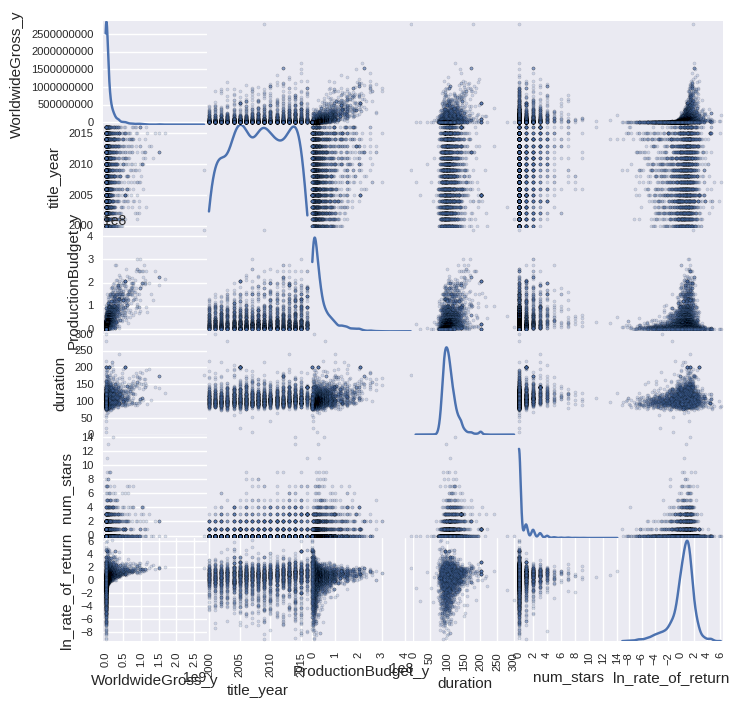

In [18]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(az[['WorldwideGross_y','title_year','ProductionBudget_y','duration','num_stars','ln_rate_of_return']],
               alpha=0.2, figsize=(8, 8), diagonal='kde');

In [19]:
y = az['WorldwideGross_y']
print(y.isnull().sum())
y.describe()

0


count    3.182000e+03
mean     1.104116e+08
std      1.936188e+08
min      4.230000e+02
25%      8.556206e+06
50%      4.174472e+07
75%      1.184714e+08
max      2.783919e+09
Name: WorldwideGross_y, dtype: float64

In [20]:
#rate_of_return = az['WorldwideGross_y'] / az['ProductionBudget_y']
y2 = az['ln_rate_of_return']
y2.describe()
#plt.hist(np.log(rate_of_return));

count    3182.000000
mean        0.261588
std         1.798859
min        -8.983567
25%        -0.331244
50%         0.617248
75%         1.306912
max         6.067309
Name: ln_rate_of_return, dtype: float64

In [21]:
X2 = X.drop(['ProductionBudget_y', 'rate_of_return','ln_rate_of_return','dum_G','dum_Color'],axis=1)
X2.describe()

,duration,title_year,num_stars,dum_ Black and White,dum_NC-17,dum_Not Rated,dum_PG,dum_PG-13,dum_R,dum_Unrated,Intercept
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.0
mean,108.800630,2008.086738,0.553740,0.024513,0.000943,0.017913,0.134192,0.386549,0.411062,0.007228,1.0
std,21.492465,4.708079,1.231759,0.154659,0.030695,0.132657,0.340912,0.487035,0.492104,0.084724,0.0
min,7.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,95.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,105.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,118.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0
max,300.000000,2016.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [20]:
#X2.to_pickle('X.pkl')
#y2.to_pickle('y.pkl')

In [22]:
from sklearn import cross_validation, datasets
from sklearn import linear_model

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                        X2, y2, test_size=0.3)

In [40]:
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso(alpha=.2)
models['elasticnet'] = linear_model.ElasticNet()

In [41]:

for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X2.columns,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
Score: 0.0731986592843
('dum_PG', 1.4983461412954504)
('dum_PG-13', 1.164365357640091)
('dum_NC-17', 1.0317987894460656)
('dum_Not Rated', -0.7291046108227407)
('dum_R', 0.7057407218711601)
('dum_ Black and White', -0.12217077092655308)
('dum_Unrated', 0.067855338838690327)
('duration', 0.010388864036698992)
('num_stars', 0.0087047944954826879)
('title_year', 0.005562190446418481)
('Intercept', 0.0)

Model: ridge
Score: 0.0725698140912
('dum_PG', 1.4584499876324184)
('dum_PG-13', 1.1275619724027965)
('dum_Not Rated', -0.74632914122964689)
('dum_NC-17', 0.74606981610369294)
('dum_R', 0.66968900791039454)
('dum_ Black and White', -0.11597491191885295)
('dum_Unrated', 0.030664819102571718)
('duration', 0.010408307123951967)
('num_stars', 0.0089928722362073634)
('title_year', 0.0054774481751006651)
('Intercept', 0.0)

Model: elasticnet
Score: 0.0147866890833
('duration', 0.010534900808482741)
('title_year', 0.0)
('num_stars', 0.0)
('dum_ Black and White', -0.0)
('dum_NC-17',

In [42]:

import statsmodels.formula.api as sm


In [43]:
model = sm.OLS(y_train,X_train )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     18.26
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.73e-32
Time:                        09:08:16   Log-Likelihood:                -4359.1
No. Observations:                2227   AIC:                             8740.
Df Residuals:                    2216   BIC:                             8803.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
duration                 0.0104      0.002      5.736      0.000         0.007     0.014
title_year               0.0056      0.008      0.703      0.482        -0.010     0.021
num_stars                0.0087      0.031      0.281      0.779        -0.052     0.070
dum_ Black and White    -0.1222      0.237     -0.516      0.606        -0.587     0.342
dum_NC-17                1.0318      1.010      1.021      0.307        -0.949     3.013
dum_Not Rated           -0.7291      0.319     -2.282      0.023        -1.356    -0.103
dum_PG                   1.4983      0.203      7.380      0.000         1.100     1.897
dum_PG-13                1.1644      0.189      6.154      0.000         0.793     1.535
dum_R                    0.7057      0.187      3.770      0.000         0.339     1.073
dum_Unrated              0.0679      0.453      0.150      0.881        -0.821     0.957
Intercept              -12.9504     15.888     -0.815      0.415       -44.107    18.206
==============================================================================
Omnibus:                      509.641   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1541.995
Skew:                          -1.159   Prob(JB):                         0.00
Kurtosis:                       6.354   Cond. No.                     8.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
len(results.predict())

2227

In [52]:
X_train2 = X_train.drop(['num_stars','dum_ Black and White', 'dum_NC-17','dum_Not Rated','title_year','dum_Unrated'],axis=1)

In [53]:
model = sm.OLS(y_train,X_train2)
results2 = model.fit()
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     43.64
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           2.66e-35
Time:                        10:40:11   Log-Likelihood:                -4363.1
No. Observations:                2227   AIC:                             8736.
Df Residuals:                    2222   BIC:                             8765.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration       0.0103      0.002      5.786      0.000         0.007     0.014
dum_PG         1.6714      0.169      9.864      0.000         1.339     2.004
dum_PG-13      1.3387      0.152      8.828      0.000         1.041     1.636
dum_R          0.8757      0.150      5.856      0.000         0.582     1.169
Intercept     -1.9371      0.224     -8.661      0.000        -2.376    -1.499
==============================================================================
Omnibus:                      501.606   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1482.451
Skew:                          -1.149   Prob(JB):                         0.00
Kurtosis:                       6.270   Cond. No.                         888.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
final = X_train2.copy()
final['predicted'] = results2.predict()
final['predicted_effect'] = np.exp(final['predicted'])
final.describe()

,duration,dum_PG,dum_PG-13,dum_R,Intercept,predicted,predicted_effect
count,2227.000000,2227.000000,2227.000000,2227.000000,2227.0,2227.000000,2227.000000
mean,108.262148,0.135608,0.384374,0.409969,1.0,0.273310,1.459444
std,21.133234,0.342449,0.486556,0.491938,0.0,0.481183,0.663143
min,7.000000,0.000000,0.000000,0.000000,1.0,-1.865361,0.154840
25%,94.000000,0.000000,0.000000,0.000000,1.0,-0.015451,0.984668
50%,104.000000,0.000000,0.000000,0.000000,1.0,0.334770,1.397619
75%,117.000000,0.000000,1.000000,1.000000,1.0,0.621919,1.862499
max,280.000000,1.000000,1.000000,1.000000,1.0,2.273026,9.708737


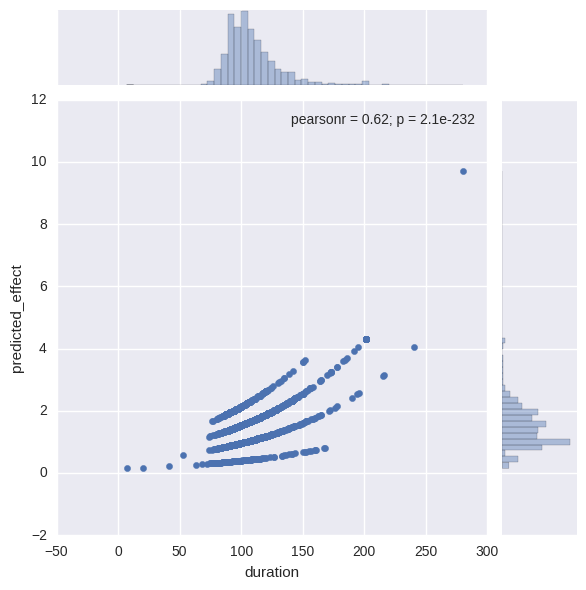

In [66]:
sns.jointplot(x="duration", y='predicted_effect',  data=final);

In [35]:
model = sm.OLS(y_test,X_test )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     8.609
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.78e-12
Time:                        08:44:57   Log-Likelihood:                -1858.1
No. Observations:                 955   AIC:                             3736.
Df Residuals:                     945   BIC:                             3785.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
duration                 0.0138      0.003      5.029      0.000         0.008     0.019
title_year               0.0012      0.012      0.095      0.924        -0.023     0.025
num_stars                0.0213      0.048      0.441      0.659        -0.073     0.116
dum_ Black and White     0.2432      0.432      0.563      0.574        -0.604     1.091
dum_NC-17             7.767e-16   4.42e-15      0.176      0.860     -7.89e-15  9.44e-15
dum_Not Rated           -1.3495      0.447     -3.020      0.003        -2.227    -0.472
dum_PG                   0.8377      0.298      2.813      0.005         0.253     1.422
dum_PG-13                0.5511      0.275      2.003      0.045         0.011     1.091
dum_R                    0.1457      0.272      0.535      0.593        -0.389     0.680
dum_Unrated             -0.0553      0.624     -0.089      0.929        -1.279     1.168
Intercept               -3.9147     24.413     -0.160      0.873       -51.824    43.995
==============================================================================
Omnibus:                      223.874   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.483
Skew:                          -1.143   Prob(JB):                    2.58e-151
Kurtosis:                       6.493   Cond. No.                     2.10e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.73e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
sum(X_test['dum_Not Rated'])

15.0

In [54]:
X_test2 = X_test.drop(['num_stars','dum_ Black and White','title_year','dum_NC-17','dum_Unrated','dum_Not Rated'],axis=1)

In [55]:
model = sm.OLS(y_test,X_test2 )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_rate_of_return   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     22.39
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           1.09e-17
Time:                        10:42:39   Log-Likelihood:                -1891.8
No. Observations:                 955   AIC:                             3794.
Df Residuals:                     950   BIC:                             3818.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
duration       0.0082      0.003      3.113      0.002         0.003     0.013
dum_PG         2.0275      0.275      7.380      0.000         1.488     2.567
dum_PG-13      1.9839      0.245      8.094      0.000         1.503     2.465
dum_R          1.5490      0.243      6.387      0.000         1.073     2.025
Intercept     -2.3469      0.351     -6.690      0.000        -3.035    -1.658
==============================================================================
Omnibus:                      179.181   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.449
Skew:                          -0.996   Prob(JB):                     2.28e-96
Kurtosis:                       5.665   Cond. No.                         943.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

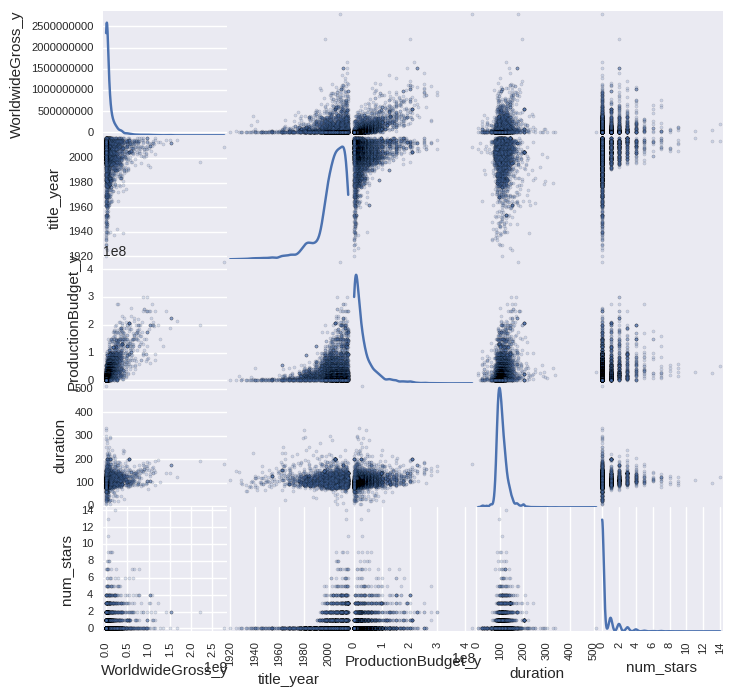

In [32]:
scatter_matrix(movies[['WorldwideGross_y','title_year','ProductionBudget_y','duration','num_stars']],
               alpha=0.2, figsize=(8, 8), diagonal='kde');

In [81]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3182 entries, 0 to 4807
Data columns (total 11 columns):
duration                3182 non-null float64
title_year              3182 non-null float64
num_stars               3182 non-null int64
dum_ Black and White    3182 non-null float64
dum_NC-17               3182 non-null float64
dum_Not Rated           3182 non-null float64
dum_PG                  3182 non-null float64
dum_PG-13               3182 non-null float64
dum_R                   3182 non-null float64
dum_Unrated             3182 non-null float64
Intercept               3182 non-null float64
dtypes: float64(10), int64(1)
memory usage: 298.3 KB


In [84]:
print(len(y))
print(type(y))
print(len(y2))
print(type(y2))

3182
<class 'pandas.core.series.Series'>
3182
<class 'pandas.core.series.Series'>


In [99]:
pred = X2.copy()
pred['ln_rate_of_return'] = y2
pred['rate_of_return'] = np.exp(y2)
pred['pred_ln_rate_of_return'] = pred['duration']*0.0103 + pred['dum_PG']*1.6714 + pred['dum_PG-13']*1.3387 + \
pred['dum_R']*0.8757 - 1.9371
pred['pred_rate_of_return'] = np.exp(pred['pred_ln_rate_of_return'])


In [100]:
pred.describe()

,duration,title_year,num_stars,dum_ Black and White,dum_NC-17,dum_Not Rated,dum_PG,dum_PG-13,dum_R,dum_Unrated,Intercept,ln_rate_of_return,rate_of_return,pred_ln_rate_of_return,pred_rate_of_return
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.0,3182.000000,3182.000000,3182.000000,3182.000000
mean,108.800630,2008.086738,0.553740,0.024513,0.000943,0.017913,0.134192,0.386549,0.411062,0.007228,1.0,0.261588,4.178478,0.285276,1.477161
std,21.492465,4.708079,1.231759,0.154659,0.030695,0.132657,0.340912,0.487035,0.492104,0.084724,0.0,1.798859,15.401137,0.479733,0.676717
min,7.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-8.983567,0.000125,-1.865000,0.154896
25%,95.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.331244,0.718030,-0.010800,0.989258
50%,105.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.617248,1.853819,0.349200,1.417933
75%,118.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.306912,3.694746,0.627300,1.872548
max,300.000000,2016.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,6.067309,431.517853,2.285600,9.831583


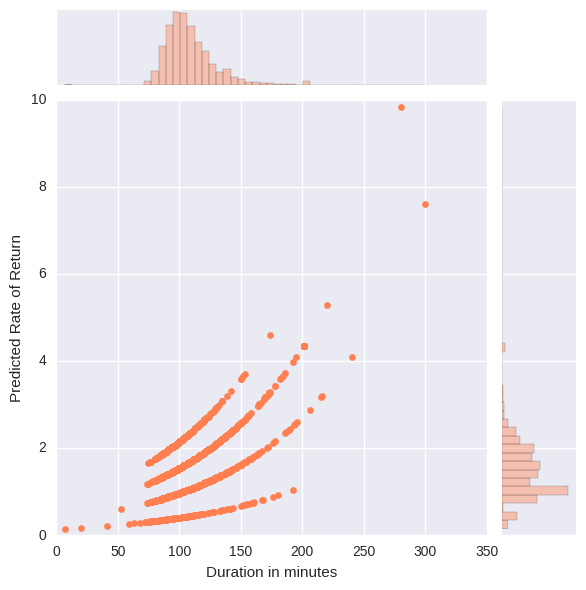

In [103]:
ax = (sns.jointplot(x="duration", y='pred_rate_of_return',  data=pred, color='coral', stat_func=None)
.set_axis_labels('Duration in minutes', 'Predicted Rate of Return'));
